In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 1
## Question 7
This requires we implement the Perceptron Learning Algorithm (PLA) for target functions $f: \mathcal{X} \rightarrow \mathcal{Y}$, where $\mathcal{X} = [-1, 1]^2$ and $\mathcal{Y} = \{-1, +1\}$, which we assume are linearly seperable. This means that the target function is determined by a line in $\mathcal{X} = [-1, 1] \times [-1, 1]$ and all points on one side of the line are assigned either $+1$ or $-1$ and all points on the other side of the line are assigned the other.

### Function definitions

In [167]:
def generate_target_function(a, b):
    """ Given two points a, b in X = [-1, 1]^2,
    this defines a line in X passing through a and b.
    We return the function f where f(x) = 1 if x is
    "above" the line and -1 if x is "below" the line.
    """
    q = b[0] - a[0]
    r = (b[1] - a[1])
    s = ((a[1] * b[0]) - (a[0] * b[1]))
    def f(x):
        if q * x[1] > (r * x[0]) + s:
            return 1.
        else:
            return -1.
    return f

In [168]:
def generate_training_data(f, n):
    """ Generates n training data points [x, y] for the given target function f,
    where x = [x1, x2] is a random point in X = [-1, 1]^2 and y = f(x).
    """
    X = 2 * np.random.random((n, 2)) - 1
    Y = np.apply_along_axis(f, axis=1, arr=X)
    X = np.insert(arr=X, obj=0, values=1, axis=1)
    return X, Y

In [169]:
def predict(X, w):
    """ Predicts output of the target function on inout X using weights x.
    """
    return np.sign(np.dot(X, w))

In [170]:
def first_mismatch(A, B):
    """ Returns the first index i where A[i] != B[i].
    """
    for i, (a, b) in enumerate(zip(A, B)):
        if a != b:
            return i

In [171]:
def pla_update(X, Y, weights):
    prediction = predict(X, weights)
    i = first_mismatch(prediction, Y)
    weights = weights + Y[i] * X[i]

In [172]:
def pla(X, Y):
    """ Performs the Perceptron Learning Algorithm using the input training
    data where f(X[i]) = Y[i]
    """
    weights = np.zeros(X.shape[1])
    prediction = predict(X, weights)
    iteration = 0
    while not (Y == prediction).all():
        i = first_mismatch(prediction, Y)
        weights = weights + Y[i] * X[i]
        prediction = predict(X, weights)
        iteration += 1
    return weights, iteration

In [173]:
def generate_hypothesis_function(weights):
    def g(x) :
        return np.sign(np.dot(weights, np.insert(x, 0, 1)))
    return g

In [174]:
def generate_line_points(a, b, n=50):
    """ Given points a and b in [-1, 1]^2, produces an array of n equally
    spaced points on the straight line through a and b.
    """
    if a[0] == b[0]:
        return np.array([[a[0], y] for y in np.arange(-1, 1, 2/n)])
    if a[1] == b[1]:
        return np.array([[x, a[1]] for x in np.arange(-1, 1, 2/n)])
    
    m = (b[1] - a[1]) / (b[0] - a[0])
    c = ((a[1] * b[0]) - (a[0] * b[1])) / (b[0] - a[0])
    return np.array([[x, (m * x) + c] for x in np.arange(-1, 1, 2/n)])

In [175]:
def get_estimated_line_points(w, n=50):
    """ Produces an array of n equally spaced points on the straight line
    in [-1, 1] forming the decision boundary of the function
    x -> sign((w^T)x) based on the estimated weights w.
    """
    if w[2] == 0:
        return np.array([-[w[0] / w[1], y] for y in np.arange(-1, 1, 2/n)])
    if w[1] == 0:
        return np.array([[x, -w[0] / w[2]] for x in np.arange(-1, 1, 2/n)])
    return np.array([[x, -(w[0] + (w[1] * x)) / w[2]] for x in np.arange(-1, 1, 2/n)])

In [176]:
def random_pla(n=10):
    a = 2 * np.random.random(2) - 1
    b = 2 * np.random.random(2) - 1
    f = generate_target_function(a, b)
    X, Y = generate_training_data(f, n)
    weights, iterations = pla(X, Y)
    return f, weights, iterations

In [177]:
def random_pla_plot(n=10):
    a = 2 * np.random.random(2) - 1
    b = 2 * np.random.random(2) - 1
    f = generate_target_function(a, b)
    L = generate_line_points(a, b)
    X, Y = generate_training_data(f, n)
    w, iterations = pla(X, Y)
    E = get_estimated_line_points(w)
    plt.scatter(X[:,1], X[:,2], c=Y + 1)
    plt.plot(L[:,0], L[:,1], label='Target Function')
    plt.plot(E[:,0], E[:,1], label='PLA Estimate ({} iterations)'.format(iterations))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.legend()

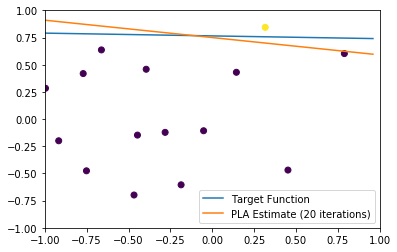

In [178]:
random_pla_plot(15)

In [192]:
def average_pla_iterations_and_error(data_points, attempts):
    total_iterations = 0
    difference = 0
    points = np.arange(0, 1, 0.01)
    for i in range(attempts):
        f, weights, iterations = random_pla(data_points)
        total_iterations += iterations
        g = generate_hypothesis_function(weights)
        for x in points:
            for y in points:
                difference += np.absolute(f([x, y]) - g([x, y])) / 2
        
    average_iterations = total_iterations / attempts
    average_error = difference / (points.size**2 * attempts)
    return average_iterations, average_error

In [193]:
print(average_pla_iterations_and_error(10, 1000))

(10.814, 0.10940615)


In [194]:
print(average_pla_iterations_and_error(100, 1000))

(192.955, 0.01398025)


In [ ]:
for N in [10, 100]:
    iterations, error = average_pla_iterations_and_error(N, 1000)
    print('{}: {}, {}'.format(N, iterations, error))

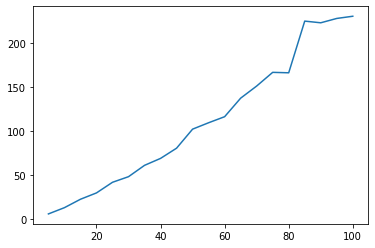

In [145]:
N = np.array(range(5, 101, 5))
A = []
for n in N:
    A.append(average_pla_iterations(n, 10000))
A = np.array(A)
plt.plot(N, A)

In [14]:
a = 2 * np.random.random(2) - 1
b = 2 * np.random.random(2) - 1
f = generate_target_function(a, b)
L = generate_line_points(a, b)
X, Y = generate_training_data(f, n)
weights = np.zeros(X.shape[1])
prediction = predict(X, weights)
while not (Y == prediction).all():
    i = first_mismatch(prediction, Y)
    weights = weights + Y[i] * X[i]
    prediction = predict(X, weights)
return weights

NameError: name 'n' is not defined